<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

### Ссылка на решение вручную: https://drive.google.com/file/d/1z9jRgCfoWXdijbZ8xvBGrpyOjwchid7d/view?usp=sharing

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [206]:
import sympy as sp

x = sp.symbols('x')
functions = {
    "f(x)": x**2 - 30*x + 1,
    "g(x)": -x**3 + 5*x - 7*x**2 + 17,
    "h(x)": x**2 - 1/x,
    "j(x)": 1/x**5 + x**17 + 8
}

def classify_extrema(critical_points, second):
    results = []
    for point in critical_points:
        if point.is_real:
            second_val = second.subs(x, point)
            if second_val.is_positive:
                results.append((point, "Минимум"))
            elif second_val.is_negative:
                results.append((point, "Максимум"))
            else:
                results.append((point, "Другое"))
    return results

for name, func in functions.items():
    first= sp.diff(func, x)
    second = sp.diff(first, x)
    critical_points = sp.solve(first, x)
    extrema = classify_extrema(critical_points, second)
    print(f"Экстремумы функции {name}:")
    for point, extremum_type in extrema:
        print(f"Точка: {point}, Тип: {extremum_type}")
    print()

Экстремумы функции f(x):
Точка: 15, Тип: Минимум

Экстремумы функции g(x):
Точка: -5, Тип: Минимум
Точка: 1/3, Тип: Максимум

Экстремумы функции h(x):
Точка: -2**(2/3)/2, Тип: Минимум

Экстремумы функции j(x):
Точка: -17**(21/22)*5**(1/22)/17, Тип: Максимум
Точка: 17**(21/22)*5**(1/22)/17, Тип: Минимум



## Задание 3 (1 балл)


Найдите точки перегиба функций из задания 1 (вручную, где возможно).
### Ссылка на решение вручную: https://drive.google.com/file/d/1z9jRgCfoWXdijbZ8xvBGrpyOjwchid7d/view?usp=sharing

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [161]:
import sympy as sp

x = sp.symbols('x')
f = x**2 - 30*x + 1
f_proizv = sp.diff(f, x)
f_double_proizv = sp.diff(f_proizv, x)
peregib_points = sp.solve(f_double_proizv, x)
if not peregib_points: print('Точек перегиба нет')

Точек перегиба нет


In [3]:
x = sp.symbols('x')
g = -x**3 + 5*x - 7*x**2 + 17
g_proizv = sp.diff(g, x)
g_double_proizv = sp.diff(g_proizv, x)
peregib_points_g = sp.solve(g_double_proizv, x)
peregib_points_g

[-7/3]

In [145]:
import sympy as sp

x = sp.symbols('x')
h = x**2 - 1/x
h_proizv = sp.diff(h, x)
h_double_proizv = sp.diff(h_proizv, x)
peregib_points_h = sp.solveset(h_double_proizv, x, domain=sp.Reals)
peregib_points_h


{1}

In [146]:
x = sp.symbols('x')
j = 1/x**5 + x**17 + 8
j_proizv = sp.diff(j, x)
j_double_proizv = sp.diff(j_proizv, x)
peregib_points_j = sp.solveset(j_double_proizv, x, domain=sp.Reals)
peregib_points_j


EmptySet

### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

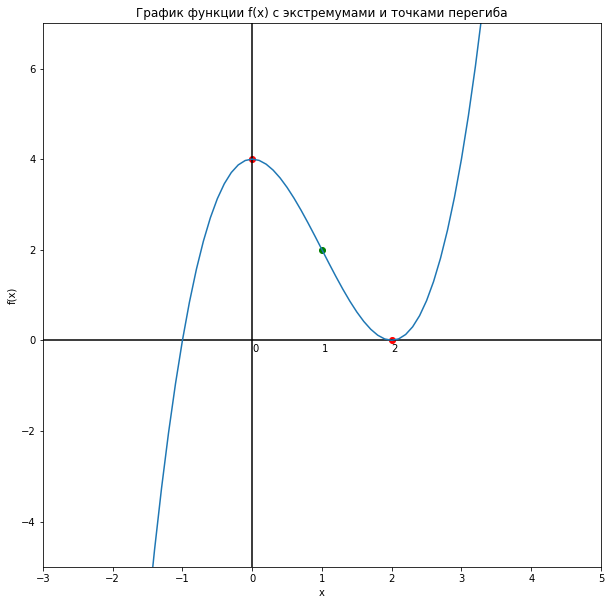

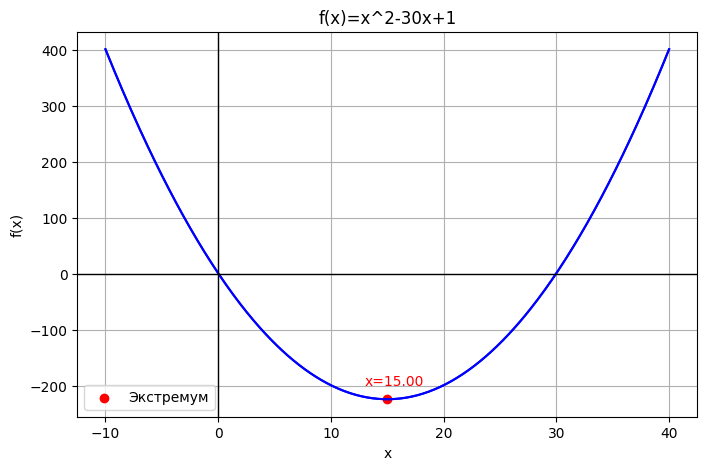

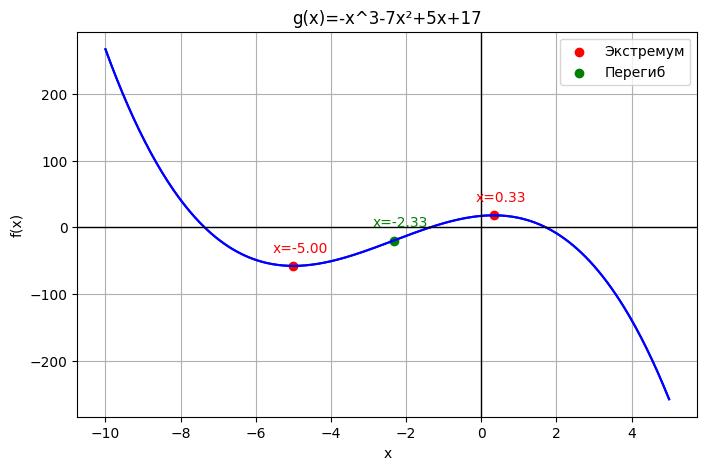

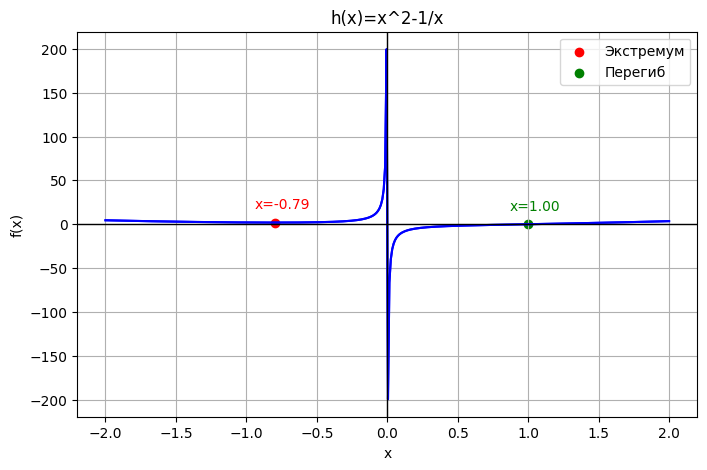

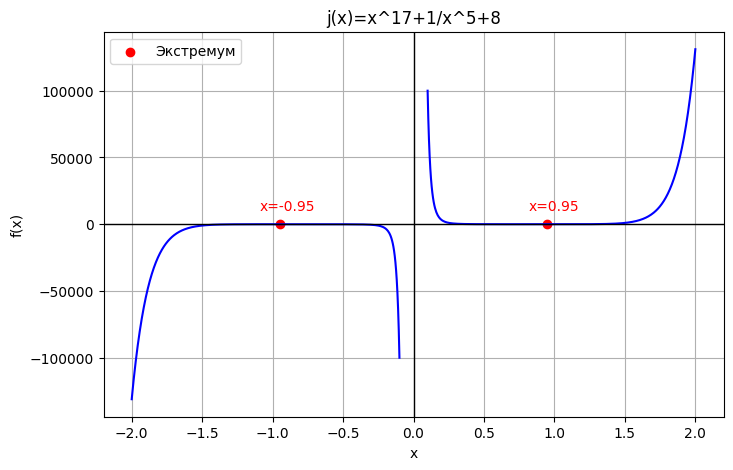

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x', real=True)
functions = [
    ("f(x)=x^2-30x+1", x**2 - 30*x + 1, (-10, 40)),
    ("g(x)=-x^3-7x²+5x+17", -x**3 - 7*x**2 + 5*x + 17, (-10, 5)),
    ("h(x)=x^2-1/x", x**2 - 1/x, (-2, 2)),
    ("j(x)=x^17+1/x^5+8", x**17 + 1/x**5 + 8, (-2, 2))
]

def plot_function(title, func, xmin, xmax):
    fprime = sp.diff(func, x)
    fsecond = sp.diff(func, (x, 2))
    critical_points = [float(p) for p in sp.solve(sp.Eq(fprime, 0), x) if p.is_real]
    inflection_points = [float(p) for p in sp.solve(sp.Eq(fsecond, 0), x) if p.is_real]

    f_lmbd = sp.lambdify(x, func, 'numpy')
    if title == "j(x)=x^17+1/x^5+8":
        X_neg = np.linspace(-2, -0.1, 400)
        X_pos = np.linspace(0.1, 2, 400)
    else:
        X_neg = np.linspace(xmin, xmax, 400)
        X_pos = np.linspace(xmin, xmax, 400)
    fig, ax = plt.subplots(figsize=(8, 5))
    
    Y_neg = f_lmbd(X_neg)
    ax.plot(X_neg, Y_neg, color='blue')
    Y_pos = f_lmbd(X_pos)
    ax.plot(X_pos, Y_pos, color='blue')
    for points, color, label in [(critical_points, 'red', 'Экстремум'), (inflection_points, 'green', 'Перегиб')]:
        for p in points:
            y_val = float(func.subs(x, p))
            ax.scatter(p, y_val, color=color, label=label if label not in ax.get_legend_handles_labels()[1] else "")
            ax.annotate(f'x={p:.2f}', (p, y_val), textcoords='offset points', xytext=(5, 10), ha='center', color=color)
    
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.legend()
    ax.grid(True)
    plt.show()

for title, func, (xmin, xmax) in functions:
    plot_function(title, func, xmin, xmax)

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [7]:
import sympy as sp

def f(x):
  # функция из семинара(лекции)
  return x**3 - 3*x**2 + 4

def gradient_descent(f, x_start, learning_rate, epsilon, delta, num_iterations):
    x = sp.symbols('x')
    df_lmbd = sp.lambdify(x, sp.diff(f(x)), 'numpy')
    x_curr = x_start
    trace = [x_curr]
    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_lmbd(x_curr)
        if np.abs(x_new) > 1e10:
            return x_curr, trace
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace
        if abs(df_lmbd(x_curr)) < delta:
            return x_curr, trace
        x_curr = x_new
    return x_curr, trace

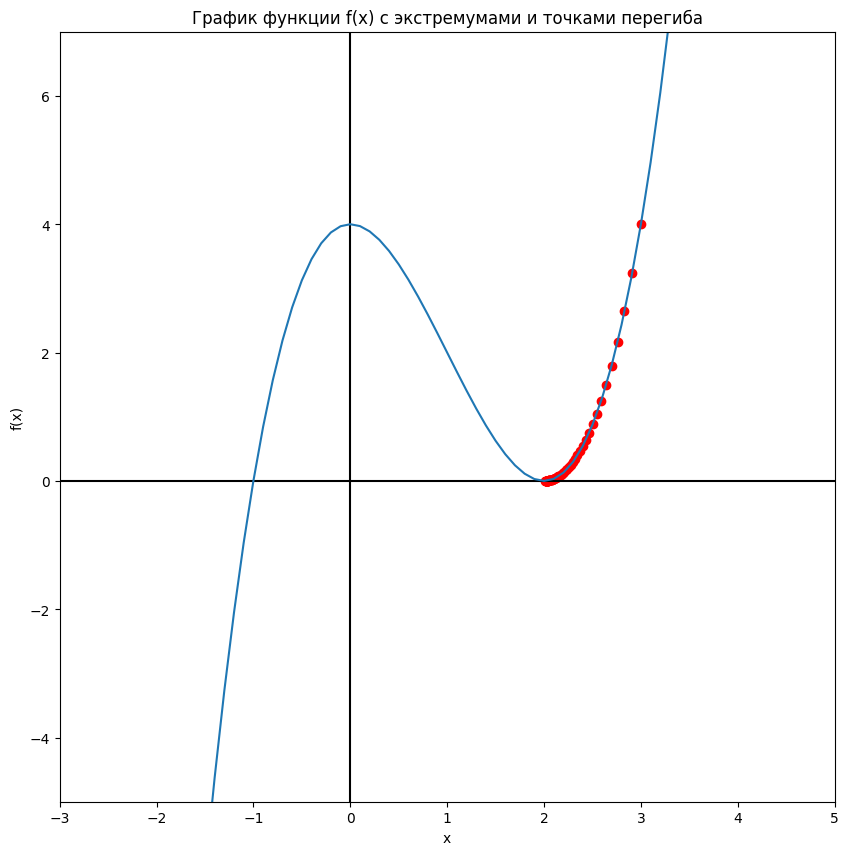

In [8]:
# проверка
xmin, trace = gradient_descent(f, 3, 0.01, 0.001, 0.00001, 100)

x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')

plt.show()

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

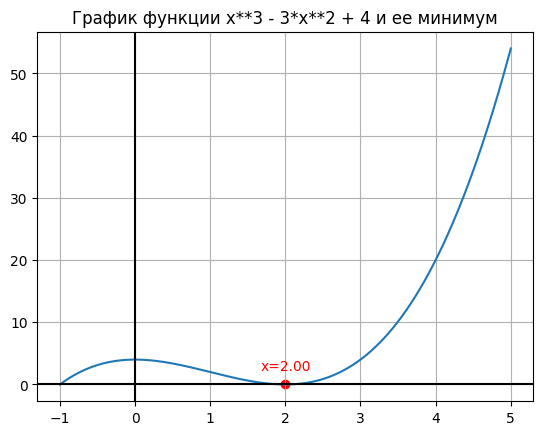

Начальное приближение: x0=0.3383439608941621, шаг: lr=0.04499332129652137, минимум: x=2, f(x)=0


In [203]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x', real=True)
# функция из семинара(лекции)
f = x**3 - 3*x**2 + 4
df = sp.diff(f, x)
f_lmbd = sp.lambdify(x, f, 'numpy')
df_lmbd = sp.lambdify(x, df, 'numpy')
x = sp.Symbol('x', real=True)
ddf = sp.diff(df, x)

# та же самая функция, но вынес f, ddf
def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]
    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_lmbd(x_curr)
        if np.abs(x_new) > 1e10:
            return x_curr, trace
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace
        if abs(df_lmbd(x_curr)) < delta:
            return x_curr, trace
        x_curr = x_new
    return x_curr, trace

results = []
for _ in range(10):
    x0 = random.uniform(-2, 2)
    lr = random.uniform(0.001, 0.05)
    x_min, trace = gradient_descent(x0, lr, 1e-7, 1e-7, 10000)
    if ddf.subs(x, x_min) > 0:
        results.append((f_lmbd(x_min), x0, lr, x_min))

if results:
    results.sort(key=lambda r: r[0])
    f_min, x0_best, lr_best, x_min = results[0]
    X = np.linspace(-1, 5, 400)
    Y = f_lmbd(X)
    plt.plot(X, Y)
    plt.scatter(x_min, f_min, color='red')
    plt.annotate(f"x={x_min:.2f}", (x_min, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title(f'График функции {f} и ее минимум')
    plt.grid()
    plt.show()
    print(f"Начальное приближение: x0={x0_best}, шаг: lr={lr_best}, минимум: x={round(x_min)}, f(x)={int(f_min)}")
else:
    print("Минимум не найден")


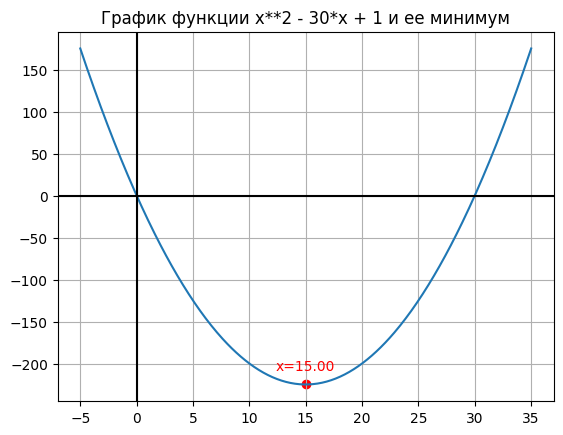

Начальное приближение: x0=-1.1560686256546941, шаг: lr=0.04720257600241767, минимум: x=15, f(x)=-223


In [202]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x', real=True)
f = x**2 - 30*x + 1
df = sp.diff(f, x)
f_lmbd = sp.lambdify(x, f, 'numpy')
df_lmbd = sp.lambdify(x, df, 'numpy')
x = sp.Symbol('x', real=True)
ddf = sp.diff(df, x)

# та же самая функция, но вынес x, ddf
def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]
    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_lmbd(x_curr)
        if np.abs(x_new) > 1e10:
            return x_curr, trace
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace
        if abs(df_lmbd(x_curr)) < delta:
            return x_curr, trace
        x_curr = x_new
    return x_curr, trace

results = []
for _ in range(10):
    x0 = random.uniform(-2, 2)
    lr = random.uniform(0.001, 0.05)
    x_min, trace = gradient_descent(x0, lr, 1e-7, 1e-7, 10000)
    if ddf.subs(x, x_min) > 0:
        results.append((f_lmbd(x_min), x0, lr, x_min))

if results:
    results.sort(key=lambda r: r[0])
    f_min, x0_best, lr_best, x_min = results[0]
    X = np.linspace(-5, 35, 400)
    Y = f_lmbd(X)
    plt.plot(X, Y)
    plt.scatter(x_min, f_min, color='red')
    plt.annotate(f"x={x_min:.2f}", (x_min, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title(f'График функции {f} и ее минимум')
    plt.grid()
    plt.show()
    print(f"Начальное приближение: x0={x0_best}, шаг: lr={lr_best}, минимум: x={round(x_min)}, f(x)={int(f_min)}")
else:
    print("Минимум не найден")


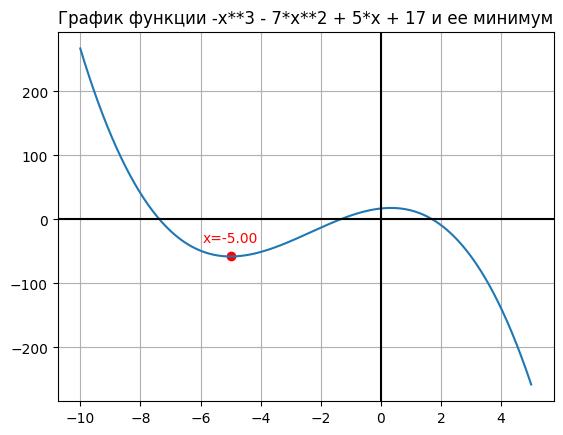

Начальное приближение: x0=-0.9320887118035466, шаг: lr=0.04689607479791221, минимум: x=-5, f(x)=-57


In [201]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x', real=True)
f = -x**3 + 5*x - 7*x**2 + 17
df = sp.diff(f, x)
f_lmbd = sp.lambdify(x, f, 'numpy')
df_lmbd = sp.lambdify(x, df, 'numpy')
x = sp.Symbol('x', real=True)
ddf = sp.diff(df, x)

# та же самая функция, но вынес x, ddf
def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]
    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_lmbd(x_curr)
        if np.abs(x_new) > 1e10:
            return x_curr, trace
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace
        if abs(df_lmbd(x_curr)) < delta:
            return x_curr, trace
        x_curr = x_new
    return x_curr, trace

results = []
for _ in range(10):
    x0 = random.uniform(-2, 2)
    lr = random.uniform(0.001, 0.05)
    x_min, trace = gradient_descent(x0, lr, 1e-7, 1e-7, 10000)
    if ddf.subs(x, x_min) > 0:
        results.append((f_lmbd(x_min), x0, lr, x_min))

if results:
    results.sort(key=lambda r: r[0])
    f_min, x0_best, lr_best, x_min = results[0]
    X = np.linspace(-10, 5, 400)
    Y = f_lmbd(X)
    plt.plot(X, Y)
    plt.scatter(x_min, f_min, color='red')
    plt.annotate(f"x={x_min:.2f}", (x_min, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title(f'График функции {f} и ее минимум')
    plt.grid()
    plt.show()
    print(f"Начальное приближение: x0={x0_best}, шаг: lr={lr_best}, минимум: x={round(x_min)}, f(x)={int(f_min)}")
else:
    print("Минимум не найден")


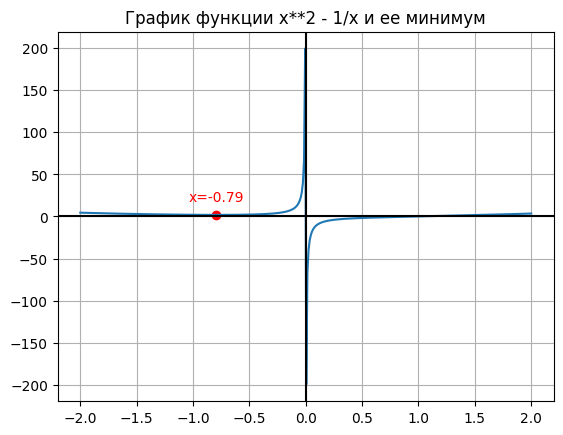

Начальное приближение: x0=0.14491236581880296, шаг: lr=0.04868267243498916, минимум: x=-1, f(x)=1


In [200]:
x = sp.Symbol('x', real=True)
f = x**2 - 1/x
df = sp.diff(f, x)
f_lmbd = sp.lambdify(x, f, 'numpy')
df_lmbd = sp.lambdify(x, df, 'numpy')
x = sp.Symbol('x', real=True)
ddf = sp.diff(df, x)

# та же самая функция, но вынес x, ddf
def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]
    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_lmbd(x_curr)
        if np.abs(x_new) > 1e10:
            return x_curr, trace
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace
        if abs(df_lmbd(x_curr)) < delta:
            return x_curr, trace
        x_curr = x_new
    return x_curr, trace

results = []
for _ in range(10):
    x0 = random.uniform(-2, 2)
    lr = random.uniform(0.001, 0.05)
    x_min, trace = gradient_descent(x0, lr, 1e-7, 1e-7, 10000)
    if ddf.subs(x, x_min) > 0:
        results.append((f_lmbd(x_min), x0, lr, x_min))

if results:
    results.sort(key=lambda r: r[0])
    f_min, x0_best, lr_best, x_min = results[0]
    X = np.linspace(-2, 2, 400)
    Y = f_lmbd(X)
    plt.plot(X, Y)
    plt.scatter(x_min, f_min, color='red')
    plt.annotate(f"x={x_min:.2f}", (x_min, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title(f'График функции {f} и ее минимум')
    plt.grid()
    plt.show()
    print(f"Начальное приближение: x0={x0_best}, шаг: lr={lr_best}, минимум: x={round(x_min)}, f(x)={int(f_min)}")
else:
    print("Минимум не найден")

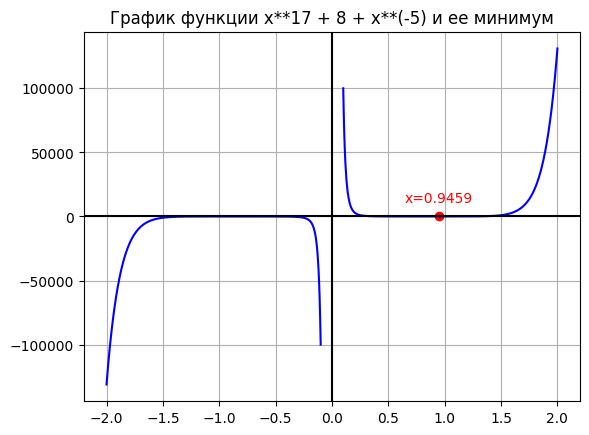

Начальное приближение: x0=0.557707193831535, шаг: lr=0.0022255270059106796, минимум: x=0.9458925047007849, f(x)=9


In [199]:
random.seed(42)

x = sp.Symbol('x', real=True)
f = 1/x**5 + x**17 + 8
df = sp.diff(f, x)
f_lmbd = sp.lambdify(x, f, 'numpy')
df_lmbd = sp.lambdify(x, df, 'numpy')
x = sp.Symbol('x', real=True)
ddf = sp.diff(df, x)

# та же самая функция, но вынес x, ddf
def gradient_descent(x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    trace = [x_curr]
    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_lmbd(x_curr)
        if np.abs(x_new) > 1e10:
            return x_curr, trace
        trace.append(x_new)
        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace
        if abs(df_lmbd(x_curr)) < delta:
            return x_curr, trace
        x_curr = x_new
    return x_curr, trace

results = []
for _ in range(10):
    x0 = random.uniform(-2, 2)
    lr = random.uniform(0.001, 0.05)
    x_min, trace = gradient_descent(x0, lr, 1e-7, 1e-7, 10000)
    if ddf.subs(x, x_min) > 0:
        results.append((f_lmbd(x_min), x0, lr, x_min))

if results:
    results.sort(key=lambda r: r[0])
    f_min, x0_best, lr_best, x_min = results[0]
    negative_x = np.linspace(-2, -0.1, 400)
    positive_x = np.linspace(0.1, 2, 400)
    negative_y = f_lmbd(negative_x)
    plt.plot(negative_x, negative_y, color='blue')
    positive_y = f_lmbd(positive_x)
    plt.plot(positive_x, positive_y, color='blue')
    plt.scatter(x_min, f_min, color='red')
    plt.annotate(f"x={x_min:.4f}", (x_min, f_min), xytext=(0, 10), textcoords="offset points", ha='center', color='red')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title(f'График функции {f} и ее минимум')
    plt.grid()
    plt.show()
    print(f"Начальное приближение: x0={x0_best}, шаг: lr={lr_best}, минимум: x={(x_min)}, f(x)={int(f_min)}")
else:
    print("Минимум не найден")


## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

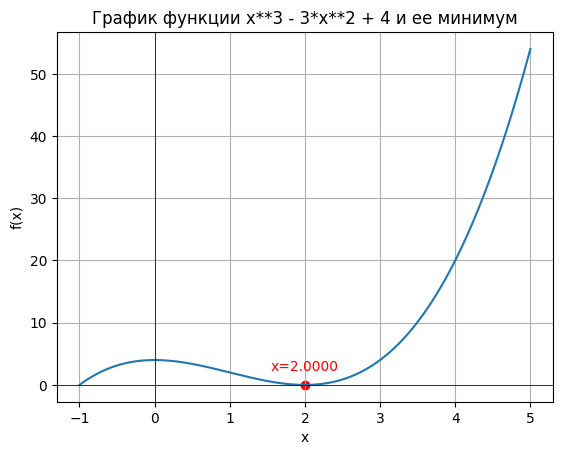

Начальное приближение (x0): 1.8171
Точка минимума (x): 2.0000
Значение функции в минимуме (f(x)): 0.0000


In [198]:
x = sp.Symbol('x', real=True)
func = x**3 - 3*x**2 + 4
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
# функция из семинара(лекции)
f = x**3 - 3*x**2 + 4
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
f_lambda = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, max_iter=10000):
    x_curr = x_start
    for _ in range(max_iter):
        df, ddf = f_prime.subs(x, x_curr), f_double_prime.subs(x, x_curr)
        if ddf == 0 or abs(df) < delta: return x_curr, []
        x_next = x_curr - df / ddf
        if abs(x_next - x_curr) < epsilon: return x_next, []
        x_curr = x_next
    return x_curr, []

results = []
for _ in range(10):
    x_start = random.uniform(-5, 5)
    x_min, _ = newton_method(x_start)
    if f_double_prime.subs(x, x_min) > 0:
        f_min = f.subs(x, x_min)
        results.append((f_min, x_start, x_min))

if results:
    f_min, x_start_best, x_min_best = min(results, key=lambda x: x[0])
    X = np.linspace(-1, 5, 400)
    Y = f_lambda(X)

    plt.plot(X, Y)
    plt.scatter(x_min_best, f_min, color='red')
    plt.annotate(f"x={x_min_best:.4f}", (x_min_best, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'График функции {f} и ее минимум')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

    print(f"Начальное приближение (x0): {x_start_best:.4f}")
    print(f"Точка минимума (x): {x_min_best:.4f}")
    print(f"Значение функции в минимуме (f(x)): {f_min:.4f}")

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [ ]:
# x = sp.symbols('x')
# f = x**2 - 30*x + 1
# g = -x**3 + 5*x - 7*x**2 + 17
# h = x**2 - 1/x
# j = 1/x**5 + x**17 + 8

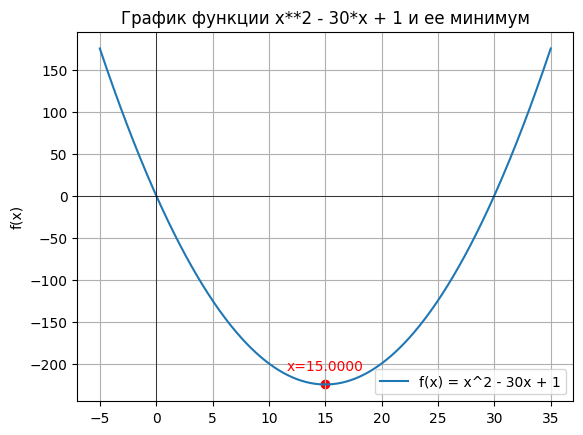

Начальное приближение (x0): -4.0909
Точка минимума (x): 15.0000
Значение функции в минимуме (f(x)): -224.0000


In [196]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = x**2 - 30*x + 1
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
f_lambda = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, max_iter=10000):
    x_curr = x_start
    for _ in range(max_iter):
        df, ddf = f_prime.subs(x, x_curr), f_double_prime.subs(x, x_curr)
        if ddf == 0 or abs(df) < delta: return x_curr, []
        x_next = x_curr - df / ddf
        if abs(x_next - x_curr) < epsilon: return x_next, []
        x_curr = x_next
    return x_curr, []

results = []
for _ in range(10):
    x_start = random.uniform(-5, 5)
    x_min, _ = newton_method(x_start)
    if f_double_prime.subs(x, x_min) > 0:
        f_min = f.subs(x, x_min)
        results.append((f_min, x_start, x_min))

if results:
    f_min, x_start_best, x_min_best = min(results, key=lambda x: x[0])
    X = np.linspace(-5, 35, 400)
    Y = f_lambda(X)

    plt.plot(X, Y, label='f(x) = x^2 - 30x + 1')
    plt.scatter(x_min_best, f_min, color='red')
    plt.annotate(f"x={x_min_best:.4f}", (x_min_best, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'График функции {f} и ее минимум')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Начальное приближение (x0): {x_start_best:.4f}")
    print(f"Точка минимума (x): {x_min_best:.4f}")
    print(f"Значение функции в минимуме (f(x)): {f_min:.4f}")


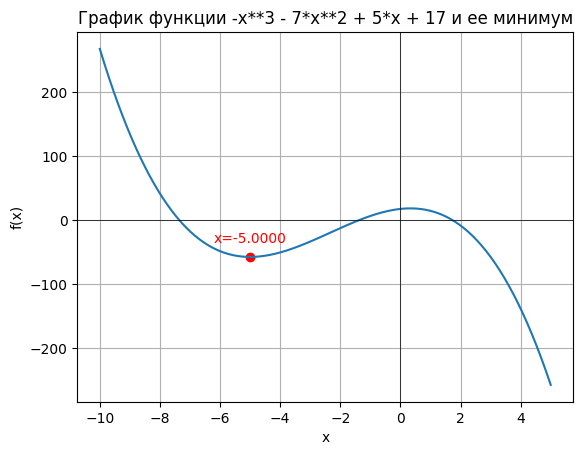

Начальное приближение (x0): -4.6790
Точка минимума (x): -5.0000
Значение функции в минимуме (f(x)): -58.0000


In [193]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import random

x = sp.Symbol('x', real=True)
f = -x**3 + 5*x - 7*x**2 + 17
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
f_lambda = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, max_iter=10000):
    x_curr = x_start
    for _ in range(max_iter):
        df, ddf = f_prime.subs(x, x_curr), f_double_prime.subs(x, x_curr)
        if ddf == 0 or abs(df) < delta: return x_curr, []
        x_next = x_curr - df / ddf
        if abs(x_next - x_curr) < epsilon: return x_next, []
        x_curr = x_next
    return x_curr, []

results = []
for _ in range(10):
    x_start = random.uniform(-5, 5)
    x_min, _ = newton_method(x_start)
    if f_double_prime.subs(x, x_min) > 0:
        f_min = f.subs(x, x_min)
        results.append((f_min, x_start, x_min))

if results:
    f_min, x_start_best, x_min_best = min(results, key=lambda x: x[0])
    X = np.linspace(-10, 5, 400)
    Y = f_lambda(X)

    plt.plot(X, Y)
    plt.scatter(x_min_best, f_min, color='red')
    plt.annotate(f"x={x_min_best:.4f}", (x_min_best, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'График функции {f} и ее минимум')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

    print(f"Начальное приближение (x0): {x_start_best:.4f}")
    print(f"Точка минимума (x): {x_min_best:.4f}")
    print(f"Значение функции в минимуме (f(x)): {f_min:.4f}")


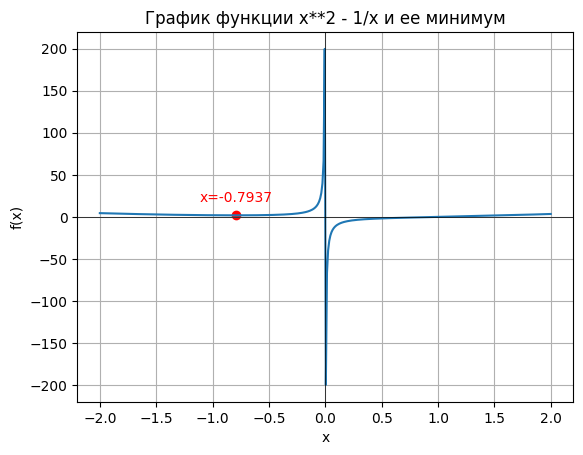

Начальное приближение (x0): -1.8455
Точка минимума (x): -0.7937
Значение функции в минимуме (f(x)): 1.8899


In [194]:
x = sp.Symbol('x', real=True)
f = x**2 - 1/x
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
f_lambda = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, max_iter=10000):
    x_curr = x_start
    for _ in range(max_iter):
        df, ddf = f_prime.subs(x, x_curr), f_double_prime.subs(x, x_curr)
        if ddf == 0 or abs(df) < delta: return x_curr, []
        x_next = x_curr - df / ddf
        if abs(x_next - x_curr) < epsilon: return x_next, []
        x_curr = x_next
    return x_curr, []

results = []
for _ in range(10):
    x_start = random.uniform(-5, 5)
    x_min, _ = newton_method(x_start)
    if f_double_prime.subs(x, x_min) > 0:
        f_min = f.subs(x, x_min)
        results.append((f_min, x_start, x_min))

if results:
    f_min, x_start_best, x_min_best = min(results, key=lambda x: x[0])
    X = np.linspace(-2, 2, 400)
    Y = f_lambda(X)

    plt.plot(X, Y, label='f(x) = x^2 - 30x + 1')
    plt.scatter(x_min_best, f_min, color='red')
    plt.annotate(f"x={x_min_best:.4f}", (x_min_best, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'График функции {f} и ее минимум')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

    print(f"Начальное приближение (x0): {x_start_best:.4f}")
    print(f"Точка минимума (x): {x_min_best:.4f}")
    print(f"Значение функции в минимуме (f(x)): {f_min:.4f}")


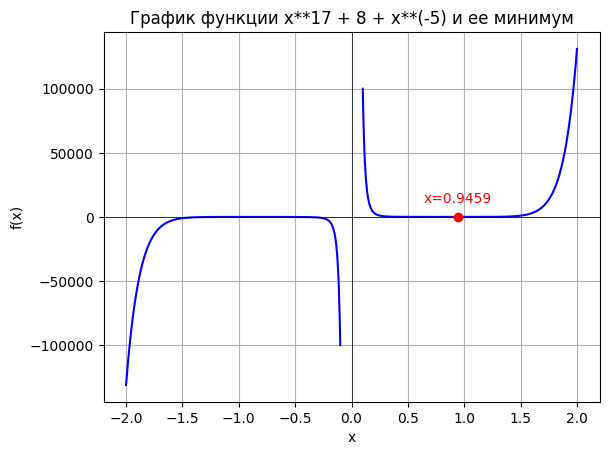

Начальное приближение (x0): 0.6137
Точка минимума (x): 0.9459
Значение функции в минимуме (f(x)): 9.7091


In [195]:
x = sp.Symbol('x', real=True)
f = 1/x**5 + x**17 + 8
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
f_lambda = sp.lambdify(x, f, 'numpy')

def newton_method(x_start, epsilon=1e-7, delta=1e-3, max_iter=10000):
    x_curr = x_start
    for _ in range(max_iter):
        df, ddf = f_prime.subs(x, x_curr), f_double_prime.subs(x, x_curr)
        if ddf == 0 or abs(df) < delta: return x_curr, []
        x_next = x_curr - df / ddf
        if abs(x_next - x_curr) < epsilon: return x_next, []
        x_curr = x_next
    return x_curr, []

results = []
for _ in range(10):
    x_start = random.uniform(-5, 5)
    x_min, _ = newton_method(x_start)
    if f_double_prime.subs(x, x_min) > 0:
        f_min = f.subs(x, x_min)
        results.append((f_min, x_start, x_min))

if results:
    f_min, x_start_best, x_min_best = min(results, key=lambda x: x[0])
    X_neg = np.linspace(-2, -0.1, 400)
    X_pos = np.linspace(0.1, 2, 400)
    Y_neg = f_lambda(X_neg)
    Y_pos = f_lambda(X_pos)
    plt.plot(X_neg, Y_neg, color='blue')
    plt.plot(X_pos, Y_pos, color='blue')

    plt.scatter(x_min_best, f_min, color='red', zorder=5)
    plt.annotate(f"x={x_min_best:.4f}", (x_min_best, f_min), xytext=(0, 10), textcoords='offset points', ha='center', color='red')

    # Настройки графика
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'График функции {f} и ее минимум')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

    # Выводим информацию о минимуме
    print(f"Начальное приближение (x0): {x_start_best:.4f}")
    print(f"Точка минимума (x): {x_min_best:.4f}")
    print(f"Значение функции в минимуме (f(x)): {f_min:.4f}")


## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [128]:
import numpy as np
import sympy as sp
import random

x = sp.Symbol('x', real=True)
f = x**2 - 1/x
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
f_lambda = sp.lambdify(x, f, 'numpy')
df_lambda = sp.lambdify(x, f_prime, 'numpy')
ddf_lambda = sp.lambdify(x, f_double_prime, 'numpy')

def newton_method(x_start, epsilon=1e-5, max_iter=10000):
    x_curr = x_start
    for _ in range(max_iter):
        df, ddf = f_prime.subs(x, x_curr), f_double_prime.subs(x, x_curr)
        if ddf == 0 or abs(df) < 1e-3: return x_curr, _
        x_next = x_curr - df / ddf
        if abs(x_next - x_curr) < epsilon: return x_next, _
        x_curr = x_next
    return x_curr, _

def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start
    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_lambda(x_curr)
        if np.abs(x_new) > 1e10: return x_curr, i
        if abs(x_new - x_curr) < epsilon: return x_new, i
        x_curr = x_new
    return x_curr, num_iterations

newton_iterations = []
gd_iterations = []
true_min = 1 / np.sqrt(2)

for _ in range(10):
    x_start = random.uniform(-5, 5)
    x_min_newton, iterations_newton = newton_method(x_start, epsilon=1e-5)
    newton_iterations.append(iterations_newton)
    lr = random.uniform(0.001, 0.05)
    x_min_gd, iterations_gd = gradient_descent(x_start, lr, epsilon=1e-5, num_iterations=10000)
    gd_iterations.append(iterations_gd)

avg_newton_iterations = np.mean(newton_iterations)
avg_gd_iterations = np.mean(gd_iterations)

print(f"Итерации Ньютона: {avg_newton_iterations}")
print(f"Итерации градиентного спуска: {avg_gd_iterations}")

results_newton = []
results_gd = []

for _ in range(10):
    x_start = random.uniform(-5, 5)
    x_min_newton, _ = newton_method(x_start, epsilon=1e-5)
    f_min_newton = f_lambda(x_min_newton)
    results_newton.append(abs(f_min_newton - f_lambda(true_min)))
    lr = random.uniform(0.001, 0.05)
    x_min_gd, _ = gradient_descent(x_start, lr, epsilon=1e-5, num_iterations=10)
    f_min_gd = f_lambda(x_min_gd)
    results_gd.append(abs(f_min_gd - f_lambda(true_min)))

avg_error_newton = np.mean(results_newton)
avg_error_gd = np.mean(results_gd)

print(f"Срелняя ошибка Ньютона: {avg_error_newton}")
print(f"Срелняя ошибка градиентного спуска: {avg_error_gd}")
print('Градиент быстрее' if avg_newton_iterations > avg_gd_iterations else 'Ньютон быстрее')
print('Градиент точнее' if avg_error_newton > avg_error_gd else 'Ньютон точнее')

Итерации Ньютона: 7.8
Итерации градиентного спуска: 148.8
Срелняя ошибка Ньютона: 2.80409514389091
Срелняя ошибка градиентного спуска: 7.975651204900634
Ньютон быстрее
Ньютон точнее


## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [129]:
import sympy as sp
import random

x = sp.Symbol('x', real=True)
f = x**2 - 1/x
f_prime = sp.diff(f, x)
f_lambda = sp.lambdify(x, f, 'numpy')
df_lambda = sp.lambdify(x, f_prime, 'numpy')

def gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations):
    x_curr = x_start
    v = 0
    for i in range(num_iterations):
        grad = df_lambda(x_curr)
        v = beta * v + (1 - beta) * grad
        x_new = x_curr - learning_rate * v
        if abs(x_new - x_curr) < epsilon: return x_new, i
        x_curr = x_new
    return x_curr, num_iterations

x_start = random.uniform(-5, 5)
learning_rate = 0.01
beta = 0.9
epsilon = 1e-5
num_iterations = 10000
x_min, iterations = gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations)
print(f"Минимум найден за {iterations} итераций: x = {x_min}, f(x) = {f_lambda(x_min)}")


Минимум найден за 248 итераций: x = -0.795452345741626, f(x) = 1.889890767942581


## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [130]:
import sympy as sp
import random

x = sp.Symbol('x', real=True)
f = x**2 - 30*x + 1
f_prime = sp.diff(f, x)
f_lambda = sp.lambdify(x, f, 'numpy')
df_lambda = sp.lambdify(x, f_prime, 'numpy')

def gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations):
    x_curr = x_start
    v = 0
    for i in range(num_iterations):
        grad = df_lambda(x_curr)
        v = beta * v + (1 - beta) * grad
        x_new = x_curr - learning_rate * v
        if abs(x_new - x_curr) < epsilon: return x_new, i
        x_curr = x_new
    return x_curr, num_iterations

x_start = random.uniform(-5, 5)
learning_rate = 0.01
beta = 0.9
epsilon = 1e-5
num_iterations = 10000
x_min, iterations = gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations)
print(f"Минимум найден за {iterations} итераций: x = {x_min}, f(x) = {f_lambda(x_min)}")

Минимум найден за 396 итераций: x = 14.999634361045764, f(x) = -223.99999986630814


In [132]:
x = sp.Symbol('x', real=True)
f = -x**3 + 5*x - 7*x**2 + 17
f_prime = sp.diff(f, x)
f_lambda = sp.lambdify(x, f, 'numpy')
df_lambda = sp.lambdify(x, f_prime, 'numpy')

def gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations):
    x_curr = x_start
    v = 0
    for i in range(num_iterations):
        grad = df_lambda(x_curr)
        v = beta * v + (1 - beta) * grad
        x_new = x_curr - learning_rate * v
        if abs(x_new - x_curr) < epsilon:
            return x_new, i
        x_curr = x_new
    return x_curr, num_iterations

x_start = random.uniform(-5, 5)
learning_rate = 0.01
beta = 0.9
epsilon = 1e-5
num_iterations = 10000
x_min, iterations = gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations)
print(f"Минимум найден за {iterations} итераций: x = {x_min}, f(x) = {f_lambda(x_min)}")

Минимум найден за 105 итераций: x = -4.999051039402251, f(x) = -57.99999279664482


In [147]:
x = sp.Symbol('x', real=True)
f = x**2 - 1/x
f_prime = sp.diff(f, x)
f_lambda = sp.lambdify(x, f, 'numpy')
df_lambda = sp.lambdify(x, f_prime, 'numpy')

def gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations):
    x_curr = x_start
    v = 0
    for i in range(num_iterations):
        grad = df_lambda(x_curr)
        v = beta * v + (1 - beta) * grad
        x_new = x_curr - learning_rate * v
        if abs(x_new - x_curr) < epsilon:
            return x_new, i
        x_curr = x_new
    return x_curr, num_iterations

x_start = random.uniform(-5, 5)
learning_rate = 0.01
beta = 0.9
epsilon = 1e-5
num_iterations = 10000
x_min, iterations = gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations)
print(f"Минимум найден за {iterations} итераций: x = {x_min}, f(x) = {f_lambda(x_min)}")

Минимум найден за 59 итераций: x = -0.7830263620160933, f(x) = 1.8902264945561353


In [187]:
import numpy as np
import sympy as sp
import random

x = sp.Symbol('x', real=True)
f = 1/x**5 + x**17 + 8
f_prime = sp.diff(f, x)
f_lambda = sp.lambdify(x, f, 'numpy')
df_lambda = sp.lambdify(x, f_prime, 'numpy')

def gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations):
    x_curr = x_start
    v = 0
    for i in range(num_iterations):
        grad = df_lambda(x_curr)
        v = beta * v + (1 - beta) * grad
        x_new = x_curr - learning_rate * v
        if abs(x_new - x_curr) < epsilon:
            return x_new, i
        if np.abs(x_new) > 1e10:
            return x_curr, i
        x_curr = x_new
    return x_curr, num_iterations

x_start = random.uniform(-5, 5)
learning_rate = 0.01
beta = 0.9
epsilon = 1e-5
num_iterations = 10000
x_min, iterations = gradient_descent_momentum(x_start, learning_rate, beta, epsilon, num_iterations)
print(f"Минимум найден за {iterations} итераций: x = {x_min}, f(x) = {f_lambda(x_min)}")
# но тут под вопросом


Минимум найден за 98 итераций: x = 0.9461602184602786, f(x) = 9.709093805824569


## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

### Кот сабрины